In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [9]:
stardf = pd.read_csv("..//TG_stars.csv")
stardf.head (7)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4
5,12.31,18.80,4.99,1.336,23.680789,6
6,9.64,17.74,1.30,0.740,20.884768,4


In [10]:
stars_df_features = stardf.copy()

stars_df_features['Amag_SQ'] = stars_df_features['Amag']**2
stars_df_features['Vmag_SQ'] = stars_df_features['Vmag']**2
stars_df_features['B-V_SQ'] = stars_df_features['B-V']**2
stars_df_features['Plx_SQ'] = stars_df_features['Plx']**2
#stars_df_features['Sum_AV'] = stars_df_features['Amag'] + stars_df_features['Vmag']
#stars_df_features['Sub_AV'] = stars_df_features['Amag'] + stars_df_features['Vmag']

stars_df_features.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
0,9.10,3.54,1.39,0.482,16.845016,3,283.754574,82.8100,0.232324,12.5316
1,9.27,21.90,3.10,0.999,20.972221,5,439.834036,85.9329,0.998001,479.6100
2,6.61,2.81,0.63,-0.019,13.853532,1,191.920338,43.6921,0.000361,7.8961
3,8.06,7.75,0.97,0.370,17.506509,3,306.477840,64.9636,0.136900,60.0625
4,8.55,2.87,1.11,0.902,15.839409,4,250.886893,73.1025,0.813604,8.2369


In [11]:
stars_df_features.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9677 non-null   float64
 1   Plx          9677 non-null   float64
 2   e_Plx        9677 non-null   float64
 3   B-V          9677 non-null   float64
 4   Amag         9677 non-null   float64
 5   TargetClass  9677 non-null   int64  
 6   Amag_SQ      9677 non-null   float64
 7   Vmag_SQ      9677 non-null   float64
 8   B-V_SQ       9677 non-null   float64
 9   Plx_SQ       9677 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 756.1 KB


In [12]:
X = stars_df_features.drop('TargetClass', axis=1, inplace=False)
Y = stars_df_features['TargetClass']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=21, stratify=Y)

In [13]:
#n_neigh = 12
#K_best = 0
#Score_best = 0

#for i in range(1,n_neigh):
   # KNN = KNeighborsClassifier(n_neighbors=i)
    #KNN.fit(X_train,Y_train)
    #Y_pred = KNN.predict(X_test)
    #if KNN.score(X_test,Y_test) > Score_best:
      #  Score_best = KNN.score(X_test,Y_test)
       # K_best = i
#print("neighbors is {} with a test accuracy of {}%""".format(K_best, (Score_best*100)))
#neighbors is 10 with a test accuracy of 52.01446280991735%

In [14]:
Y_test.value_counts()

5    547
3    491
4    436
2    257
1    112
6     87
7      4
0      2
Name: TargetClass, dtype: int64

In [15]:
Y_test.count ()

1936

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
Y_train.value_counts()

5    2186
3    1966
4    1742
2    1028
1     447
6     346
7      18
0       8
Name: TargetClass, dtype: int64

In [18]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [42]:
#model = KNeighborsClassifier(n_neighbors=5)
#model.fit(X_train,Y_train)
#Y_pred = KNN.predict(X_test)
#print("Precision Score : ",precision_score(Y_test, Y_pred, 
                                          # pos_label='positive',
                                           #average='micro'))
#print("Recall Score : ",recall_score(Y_test, Y_pred, 
                                           #pos_label='positive',
                                           #average='micro'))
        
#Precision Score :  0.5175619834710744
#Recall Score :  0.5175619834710744     

In [43]:
#classifier = LogisticRegression()
#classifier.fit(X_train, Y_train)

#print(f"LR Training Data: {classifier.score(X_train, Y_train)}")
#print(f"LR Testing Data: {classifier.score(X_test, Y_test)}")
#LR Training Data: 0.5083322568143651
#LR Testing Data: 0.5051652892561983

In [22]:
rfc = RandomForestClassifier()

In [ ]:
forest_params = [{'max_depth': list(range(10, 40)), 'max_features': list(range(20,40))}]

clf = GridSearchCV(rfc, forest_params, cv = 5, scoring='accuracy')

clf.fit(X_train, Y_train)

In [ ]:
print(clf.best_params_)

In [ ]:
print(clf.best_score_)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf =RandomForestClassifier(n_estimators=200, max_features="log2", max_depth=10).fit(X_train_scaled, Y_train)

y_pred=clf.predict(X_test_scaled)

print(f'RFC Training Data : {clf.score(X_train_scaled,Y_train)}')
print(f'RFC Testing Data: {clf.score(X_test_scaled,Y_test)}')

In [49]:
feature_importances = clf.feature_importances_

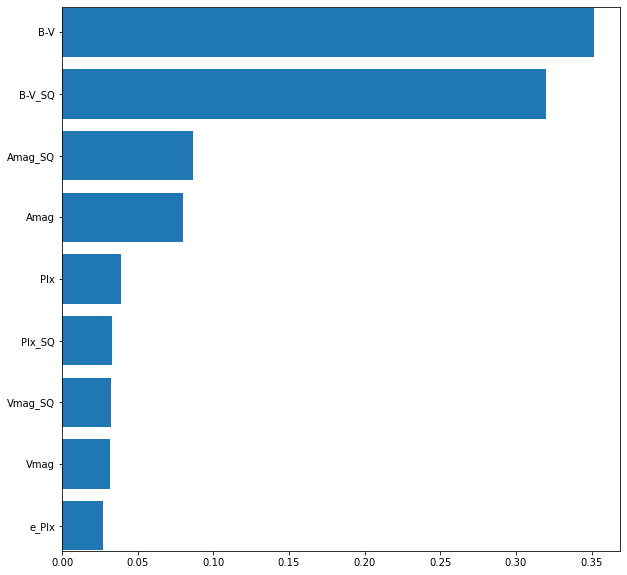

In [50]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [ ]:


#RFC Training Data : 0.8699134478749515
#RFC Testing Data: 0.7742768595041323 #n_estimators=200, max_features="log2", max_depth=10
#RFC Training Data : 0.9711923524092495
#RFC Testing Data: 0.7608471074380165(n_estimators=200, max_features="log2", max_depth=15)
#RFC Training Data : 0.8697842655987599
#RFC Testing Data: 0.7706611570247934 (n_estimators=200, max_features="auto", max_depth=10)

In [26]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [30]:
X_selected_train, X_selected_test, Y_train, Y_test = train_test_split(sel.transform(X), Y)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [33]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, Y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, Y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, Y_test)}')

Training Score: 0.746589499793303
Testing Score: 0.7260330578512396


In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf =RandomForestClassifier(n_estimators=100, max_features=12, max_depth=10).fit(X_train_scaled, Y_train)

y_pred=clf.predict(X_test_scaled)

print(f'RFC Training Data : {clf.score(X_train_scaled,Y_train)}')
print(f'RFC Testing Data: {clf.score(X_test_scaled,Y_test)}')

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
X, Y = make_classification(n_samples=1936,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier() 

param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,3,5,7,10],    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, Y)
print (CV_rfc.best_params_)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:

#RFC Training Data : 0.8699134478749515
#RFC Testing Data: 0.7742768595041323 #n_estimators=200, max_features="log2", max_depth=10
#RFC Training Data : 0.9711923524092495
#RFC Testing Data: 0.7608471074380165(n_estimators=200, max_features="log2", max_depth=15)
#RFC Training Data : 0.8697842655987599
#RFC Testing Data: 0.7706611570247934 (n_estimators=200, max_features="auto", max_depth=10)